# Test run pipeline
Starting from calints run entire pipeline and preview results plots

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))

from src.utility.h5_serializable_file import H5Serializable
import src.utility.utils as utils 
from uncertainties import ufloat
from src.photometry_data import PhotometryData
from src.utility.run_cfg import ErebusRunConfig
from src.erebus import Erebus
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lhs1478b = ErebusRunConfig.load("./lhs1478b_run.yaml")

In [3]:
erebus = Erebus(lhs1478b, force_clear_cache=True)

Loading data from calints in /mnt/c/Users/nicho/Research/GitHub/erebus/manual_tests/mast_lhs1478b
Loading 5 segments
INT_TIMES format: (1, 60329.22548765673, 60329.225555258396, 60329.22562286005, 60329.228486335065, 60329.228553933965, 60329.228621532864)
Loaded segment 1
INT_TIMES format: (235, 60329.25793645459, 60329.258004056246, 60329.25807165791, 60329.26093380684, 60329.261001405735, 60329.261069004635)
Loaded segment 2
INT_TIMES format: (469, 60329.29038525245, 60329.29045285411, 60329.290520455776, 60329.2933812779, 60329.2934488768, 60329.2935164757)
Loaded segment 3
INT_TIMES format: (703, 60329.32283405031, 60329.322901651976, 60329.32296925363, 60329.32582874826, 60329.32589634715, 60329.325963946045)
Loaded segment 4
INT_TIMES format: (937, 60329.35528284817, 60329.35535044983, 60329.35541805149, 60329.35827621789, 60329.35834381678, 60329.35841141568)
Loaded segment 5
Sorting data
Found star at: 127, 127
Cleaning 964 frames
50 pixels were bad out of 16129
351 values wer

### Plotting initial guess

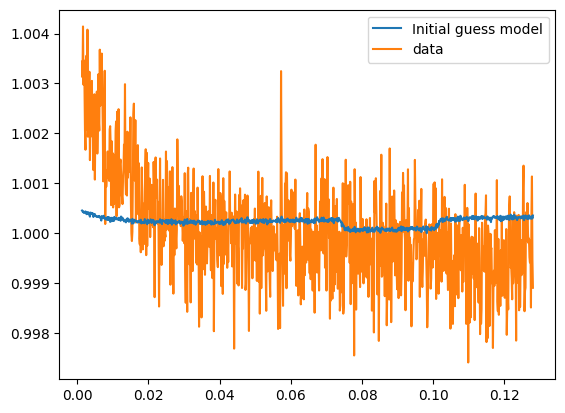

In [4]:
fit = erebus.individual_fits[0]
mcmc = fit.mcmc
initial_guess = np.array([mcmc.params[p].value for p in mcmc.params])[:-1]

t = fit.time
f = fit.raw_flux
f_model = fit.fit_method(t, *initial_guess)

plt.plot(t, f_model, label='Initial guess model', zorder=3)
plt.plot(t, f, label='data')
plt.legend()
plt.show()

In [5]:
erebus.run(output_folder="./test_output/", force_clear_cache=True)

Initial guesses: [0.08793104333977175, 0.0002, 2458786.75425, 0.0462, 16.119, 1.9495378, 87.452, 0.1, 0.1, 0.1, 0.1, 0.1, 0.001, 1e-06, 0.0004] variation: [0.00021000250147319675, 0.000325, 0.00021, 0.00055, 0.047, 2.05e-06, 0.026, 2.475, 2.475, 2.475, 2.475, 2.475, 0.49975, 0.0024997500000000002, 0.0001]
Initial likelihood: 3124.8668630132834
Fitting for 15 parameters
Moved away from starting positions
Initial guesses shape: (2, 64, 15)
Mean likelihood after moving: 5214.655396572156
process chain 0


100%|█████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:53<00:00, 88.28it/s]


process chain 1


100%|█████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:51<00:00, 89.38it/s]


Rubin gelman convergence: [1.00022947 1.00024777 1.00003174 1.00020362 1.00023281 1.00037522
 1.00049388 1.00127768 1.00009257 1.00034605 1.00000193 1.00008997
 1.0006909  1.00015746 1.00001863] converged? True
Autocorr time: 168.3036912046253 converged? True
Iterations: 10000 Max steps: 100000
Continue looping? False
Autocorr time: 168.3036912046253
{'t_sec': 0.08799648268232443+/-0.00039639487608265217, 'fp': -0.0001420974406053113+/-7.049004397602075e-05, 't0': 2458786.754234921+/-0.0004155565984547138, 'rp_rstar': 0.04619752016563662+/-0.001098067967620478, 'a_rstar': 16.119657268534297+/-0.09250836265547058, 'p': 1.9495377689502797+/-4.128097862876601e-06, 'inc': 87.45248667546565+/-0.050463662520733976, 'ecc': 0.0+/-0, 'w': 0.0+/-0, 'pc1': 1.1544236163858006+/-0.1254520657499527, 'pc2': 1.098483374077314+/-0.09493722544441885, 'pc3': 0.04392862158666179+/-0.20795768441360693, 'pc4': 0.1279769438064713+/-0.1920897493649978, 'pc5': -0.16673213509704973+/-0.2204373288284886, 'exp1':

100%|█████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:49<00:00, 91.59it/s]


process chain 1


100%|█████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:47<00:00, 93.04it/s]


Rubin gelman convergence: [1.00002977 1.00007633 1.00003885 1.00017408 1.00008621 1.00003819
 1.00006067 1.00116412 1.0013981  1.00008561 1.00034123 1.000178
 1.00129296 1.00111012 0.99999872] converged? True
Autocorr time: 170.76489545882563 converged? True
Iterations: 10000 Max steps: 100000
Continue looping? False
Autocorr time: 170.76489545882563
{'t_sec': 0.08857467464304172+/-0.00040776165911965423, 'fp': 0.0001718612611912141+/-6.75736799859023e-05, 't0': 2458786.754249869+/-0.0004095772746950388, 'rp_rstar': 0.04620897342108189+/-0.0010929571907080694, 'a_rstar': 16.13590842952818+/-0.09400662034449248, 'p': 1.949537792416033+/-4.104995757314711e-06, 'inc': 87.43565249328648+/-0.05159928845228734, 'ecc': 0.0+/-0, 'w': 0.0+/-0, 'pc1': 0.041935155819365896+/-0.04658786351843286, 'pc2': -0.14518862665429036+/-0.10148867977456309, 'pc3': 0.208300810823202+/-0.20988336599011212, 'pc4': -0.20993645126217866+/-0.19296225866934985, 'pc5': -0.3677984879048175+/-0.2109532735247116, 'exp1

100%|█████████████████████████████████████████████████████████████████████████████| 10000/10000 [05:25<00:00, 30.73it/s]


process chain 1


100%|█████████████████████████████████████████████████████████████████████████████| 10000/10000 [05:28<00:00, 30.48it/s]


Rubin gelman convergence: [1.00000032 0.99999886 1.00003422 1.00000341 1.000055   1.00020445
 1.00013219 1.00021401 1.00108277 1.00072476 1.00017971 1.00031089
 1.00000828 1.00024573 1.00034967 1.00004369] converged? True
Autocorr time: 184.37359434504438 converged? True
Iterations: 10000 Max steps: 100000
Continue looping? False
Autocorr time: 184.37359434504438
{'t_sec_offset': 0.0+/-0, 'fp': -1.0886446544437214e-05+/-5.002872871328637e-05, 't0': 2458786.75425+/-0, 'rp_rstar': 0.0462+/-0, 'a_rstar': 16.119+/-0, 'p': 1.9495378+/-0, 'inc': 87.452+/-0, 'ecc': 0.0+/-0, 'w': 0.0+/-0, 'pc1_0': -0.04523871598960188+/-0.14503081023698167, 'pc2_0': -0.10659590292840365+/-0.11294379728067395, 'pc3_0': 0.35597983617249607+/-0.3108504941153302, 'pc4_0': -0.28867748118691017+/-0.40366170352091774, 'pc5_0': -0.5695326796039235+/-0.35116785040140336, 'exp1_0': 0.0+/-0, 'exp2_0': 0.0+/-0, 'a_0': -0.007478664844319777+/-0.0014516813604001691, 'b_0': 0.00048714535607637403+/-0.00010766669189540159, 'p

2


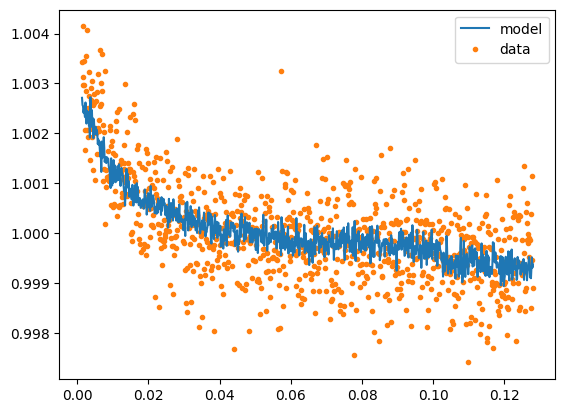

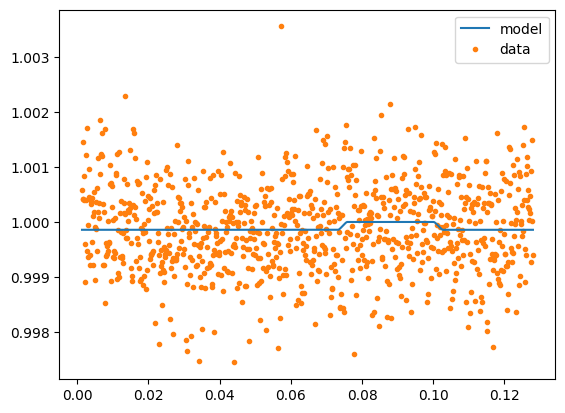

(-1.4+/-0.7)e+02


In [6]:
fit = erebus.individual_fits[0]
print(fit.order)

res = fit.results
res_nominal_values = [res[k].nominal_value for k in res][:-1]
physical_params = res_nominal_values[:9]
systematic_params = res_nominal_values[9:]

t = fit.time
f = fit.raw_flux
f_model = fit.fit_method(t, *res_nominal_values)
plt.plot(t, f_model, label='model', zorder=3)
plt.plot(t, f, linestyle='', marker='.', label='data')
plt.legend()
plt.show()

f_systematic = fit.systematic_model(t, *systematic_params)
plt.plot(t, f_model / f_systematic, label='model', zorder=3)
plt.plot(t, f / f_systematic, linestyle='', marker='.', label='data')
plt.legend()
plt.show()

print(res['fp']*1e6)